# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계2. 탐색적 데이터 분석

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = pd.read_csv('sbikedata_process.csv')

#### 2) 기본 정보 조회

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 행,열 개수 확인
df.shape

(5827, 13)

In [46]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 모든 변수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5827 non-null   float64
 3   PM2.5          5827 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
 11  month          5827 non-null   int64  
 12  weekday        5827 non-null   int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 591.9+ KB


In [49]:
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,weekday
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4,3
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4,3
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4,3
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4,3
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4,3


In [78]:
print(list(df))

['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature', 'precipitation', 'windspeed', 'humidity', 'visibility', 'count', 'month', 'weekday']


In [85]:
def anova_and_barplot(df, var, target):
    # Barplot 그리기
    sns.barplot(x=var, y=target, data=df)
    plt.grid()
    plt.show()
    
    # ANOVA 분석 수행
    groups = [df.loc[df[var] == i, target] for i in sorted(df[var].unique())]
    f_statistic, p_value = spst.f_oneway(*groups)
    
    # 결과 출력
    print(f'ANOVA result for {var}: F-statistic: {f_statistic}, p-value: {p_value}')

In [83]:
df['hour_section'] = df['hour'] // 6
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,weekday,hour_section
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4,3,0
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4,3,0
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4,3,0
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4,3,0
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4,3,0


In [98]:
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,weekday,hour_section
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4,3,0
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4,3,0
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4,3,0
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4,3,0
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4,3,0


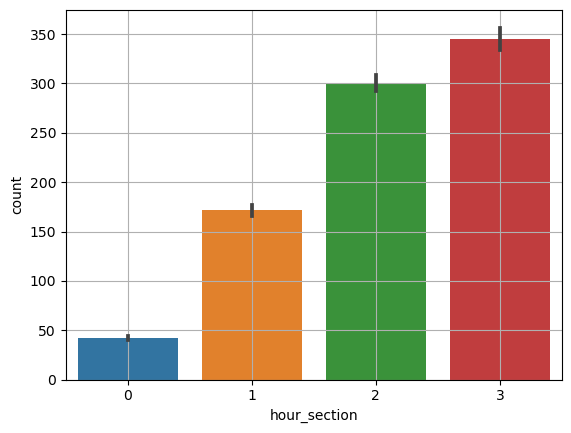

ANOVA result for hour_section: F-statistic: 1323.0607762149743, p-value: 0.0


In [87]:
var = 'hour_section'
target = 'count'
anova_and_barplot(df, var, target)

In [ ]:
['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature', 'precipitation', 'windspeed', 'humidity', 'visibility', 'count', 'month', 'weekday']

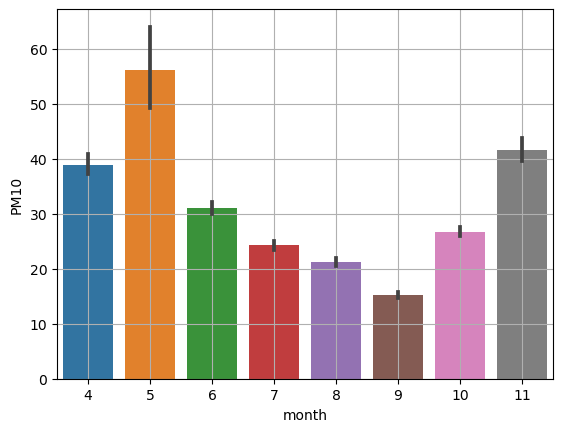

ANOVA result for month: F-statistic: 76.30377641225269, p-value: 3.079643227038425e-106


In [89]:
var = 'month'
target = 'PM10'
anova_and_barplot(df, var, target)

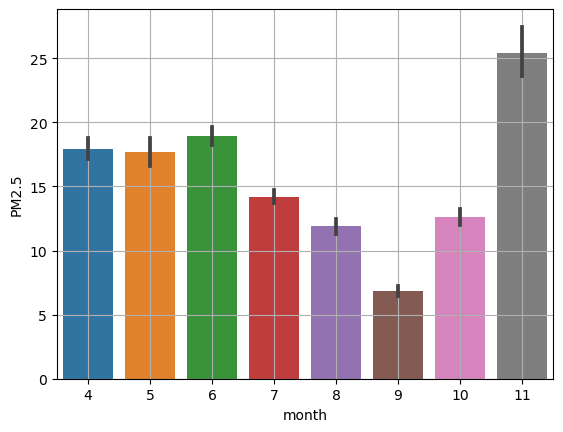

ANOVA result for month: F-statistic: 136.3632712402796, p-value: 1.2045439602069044e-186


In [90]:
var = 'month'
target = 'PM2.5'
anova_and_barplot(df, var, target)

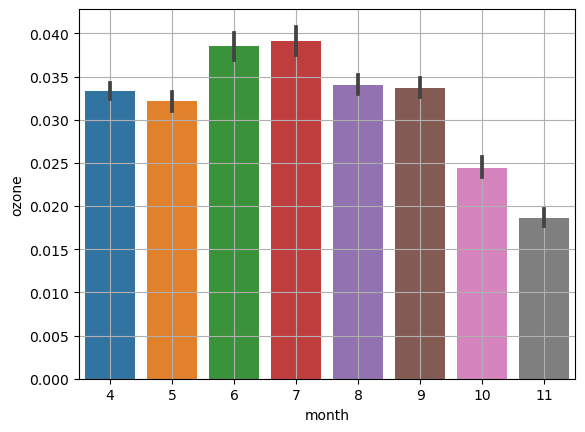

ANOVA result for month: F-statistic: 120.78953304746865, p-value: 2.944840927885283e-166


In [91]:
var = 'month'
target = 'ozone'
anova_and_barplot(df, var, target)

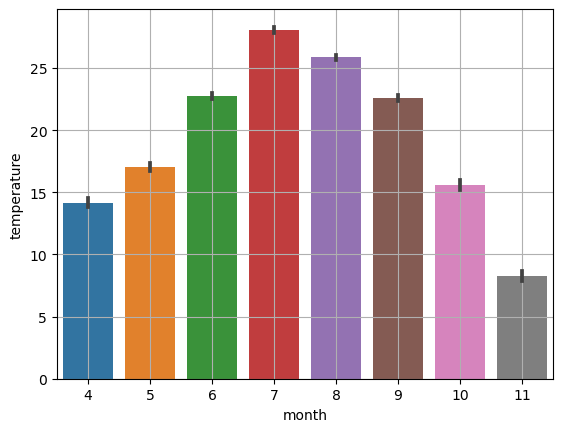

ANOVA result for month: F-statistic: 1777.8789353836387, p-value: 0.0


In [92]:
var = 'month'
target = 'temperature'
anova_and_barplot(df, var, target)

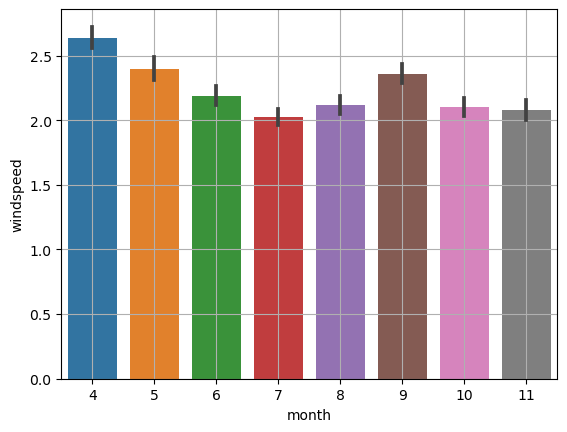

ANOVA result for month: F-statistic: 29.567902948167568, p-value: 2.1163477563322557e-40


In [93]:
var = 'month'
target = 'windspeed'
anova_and_barplot(df, var, target)

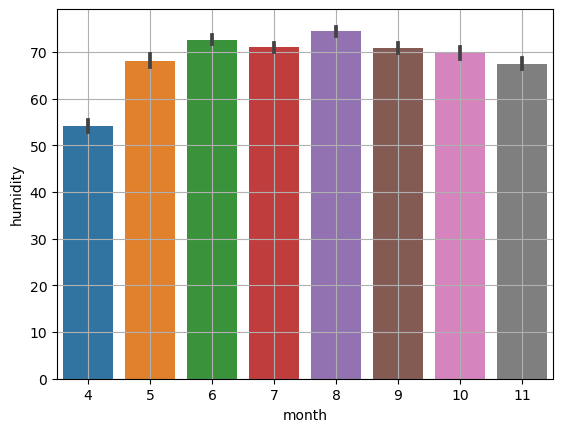

ANOVA result for month: F-statistic: 105.36445671523731, p-value: 9.51509754201665e-146


In [94]:
var = 'month'
target = 'humidity'
anova_and_barplot(df, var, target)

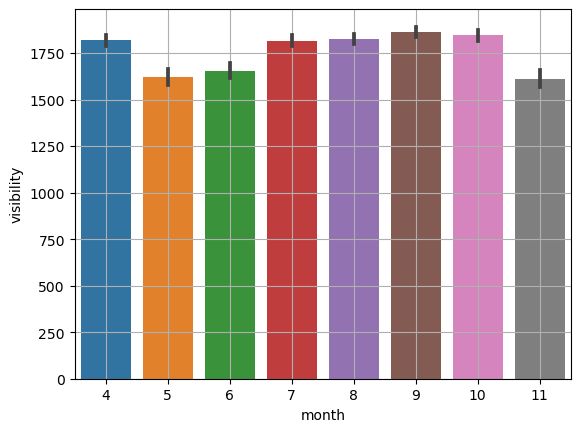

ANOVA result for month: F-statistic: 35.99136369380943, p-value: 1.3664273442378645e-49


In [95]:
var = 'month'
target = 'visibility'
anova_and_barplot(df, var, target)

In [66]:
df_sum_hour = df.groupby(by=['hour'], as_index = False)['count'].sum()
df_sum_pm10 = df.groupby(by=['PM10'], as_index = False)['count'].sum()
df_sum_pm25 = df.groupby(by=['PM2.5'], as_index = False)['count'].sum()
df_sum_oz = df.groupby(by=['ozone'], as_index = False)['count'].sum()
df_sum_temp = df.groupby(by=['temperature'], as_index = False)['count'].sum()
df_sum_wind = df.groupby(by=['windspeed'], as_index = False)['count'].sum()
df_sum_humi = df.groupby(by=['humidity'], as_index = False)['count'].sum()
df_sum_visib = df.groupby(by=['visibility'], as_index = False)['count'].sum()


In [74]:
# df_mean_hour.corr(numeric_only = True)['count']

hour     0.748564
count    1.000000
Name: count, dtype: float64

In [75]:
# df_mean_temp.corr(numeric_only = True)['count']

temperature    0.769257
count          1.000000
Name: count, dtype: float64

In [76]:
# df_mean_humi.corr(numeric_only = True)['count']

humidity   -0.949439
count       1.000000
Name: count, dtype: float64

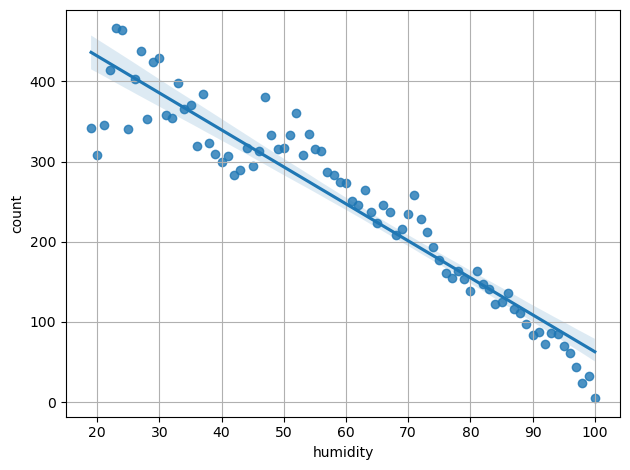

humidity의 상관계수 : -0.9494385857106733, p-value : 5.249822935061529e-42


In [80]:
var = 'humidity'
target = 'count'
eda_num_num_2(var, target, df_mean_humi)

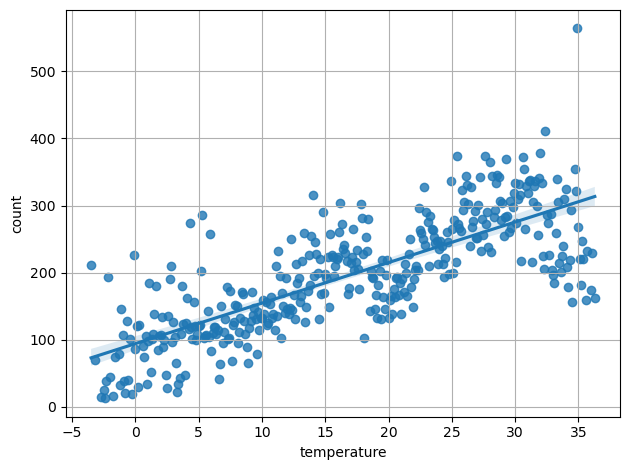

temperature의 상관계수 : 0.7692572762944199, p-value : 5.957795639893806e-75


In [79]:
var = 'temperature'
target = 'count'
eda_num_num_2(var, target, df_mean_temp)

In [63]:
def eda_num_num_2(var, target, data):
    # 산점도
    sns.regplot(x = var, y = target, data = data)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # 상관계수
    result = spst.pearsonr(data[var], data[target])
    print(f'{var}의 상관계수 : {result[0]}, p-value : {result[1]}')

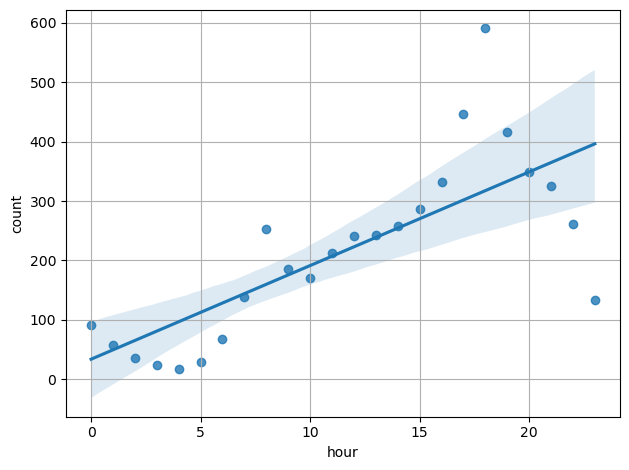

hour의 상관계수 : 0.7485642292809059, p-value : 2.585206957245293e-05


In [64]:
var = 'hour'
target = 'count'
eda_num_num_2(var, target, df_mean_hour)

## 2.EDA 2단계 - 가설 설정

*  '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

    * 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

        - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
        - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

        로 가설이 자연스레 수립 됩니다.


### (1) 가설 수립
* 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요.
    * Guide : Target은 따릉이 대여량 입니다.

* 가설 1

    * 귀무가설 1: 시간과 따릉이 대여량간에는 관계가 없다.
    * 대립가설 1: 시간과 따릉이 대여량간에는 관계가 있다.
>
* 가설 2

    * 귀무가설 2: 미세먼지 수치와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 2: 미세먼지 수치와 따릉이 대여량간에는 관계가 있다.
>
* 가설 3

    * 귀무가설 3: 초미세먼지 수치와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 3: 초미세먼지 수치와 따릉이 대여량간에는 관계가 있다.
>
* 가설 4

    * 귀무가설 4: 오존 농도와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 4: 오존 농도와 따릉이 대여량간에는 관계가 있다.
>
* 가설 5

    * 귀무가설 5: 온도와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 5: 온도와 따릉이 대여량간에는 관계가 있다.
>
* 가설 6

    * 귀무가설 6: 강우여부와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 6: 강우여부와 따릉이 대여량간에는 관계가 있다.
> 
* 가설 7

    * 귀무가설 7: 풍속과 따릉이 대여량간에는 관계가 없다.
    * 대립가설 7: 풍속과 따릉이 대여량간에는 관계가 있다.
>
* 가설 8

    * 귀무가설 8: 습도와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 8: 습도와 따릉이 대여량간에는 관계가 있다.
>
* 가설 9

    * 귀무가설 9: 시정과 따릉이 대여량간에는 관계가 없다.
    * 대립가설 9: 시정과 따릉이 대여량간에는 관계가 있다.
>
* 가설 10

    * 귀무가설 10: month와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 10: month와 따릉이 대여량간에는 관계가 있다.
>
* 가설 11

    * 귀무가설 11: day와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 11: day와 따릉이 대여량간에는 관계가 있다.
>
* 가설 12

    * 귀무가설 12: weekday와 따릉이 대여량간에는 관계가 없다.
    * 대립가설 12: weekday와 따릉이 대여량간에는 관계가 있다.

## 3.EDA 3단계 - 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    1. 시각화 : 그래프를 활용한 데이터 분석
    2. 수치화 : t-test, anova
    3. 관계 평가

* 귀무가설은 X가 Y와 관련이 없다. 
* 대립가설은 X와 Y가 관련이 있다.

* P-value (유의확률)가 0.05 이하라면? 해당 변수는 매우 유의미한 값으로 판단 가능함

#### 1) 강수 여부와 따릉이 대여량간 이변량 분석

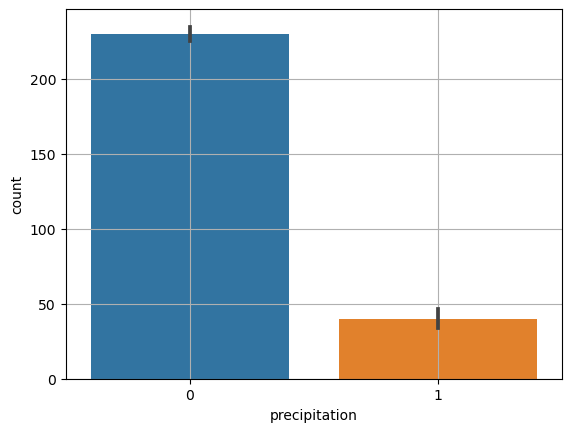

TtestResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98, df=5825.0)

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'precipitation'
target = 'count'

sns.barplot(x=var, y=target, data = df)
plt.grid()
plt.show()

not_rain = df.loc[df[var] == 0, target]
rain = df.loc[df[var] == 1, target]

spst.ttest_ind(not_rain, rain)

- 1시간 전 비가 오지 않았을때 (0 일때) 따릉이 대여 건수 평균이 200이상임
- 1시간 전 비가 왔을때 (1 일때) 따릉이 대여 건수는 매우 낮은 편임
- **통계량과 p-value의 유의수준으로 볼 때 강우유무와 따릉이 대여 건수는 매우 큰 관련이 있다**

In [32]:
def anova_and_barplot(df, var, target):
    # Barplot 그리기
    sns.barplot(x=var, y=target, data=df)
    plt.grid()
    plt.show()
    
    # ANOVA 분석 수행
    groups = [df.loc[df[var] == i, target] for i in sorted(df[var].unique())]
    f_statistic, p_value = spst.f_oneway(*groups)
    
    # 결과 출력
    print(f'ANOVA result for {var}: F-statistic: {f_statistic}, p-value: {p_value}')

#### 2) hour와 따릉이 대여량간 이변량 분석

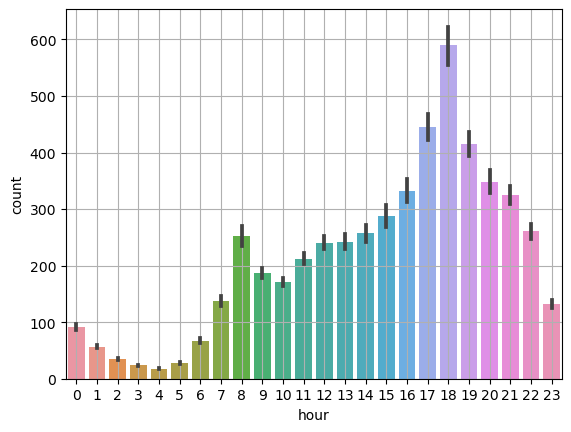

ANOVA result for hour: F-statistic: 401.6928835651985, p-value: 0.0


In [ ]:
var = 'hour'
anova_and_barplot(df, var, target)

- hour를 시간대로서 범주형으로 볼 때 따릉이 대여량과 관련이 아주 있어보임

#### 3) month와 따릉이 대여량간 이변량 분석

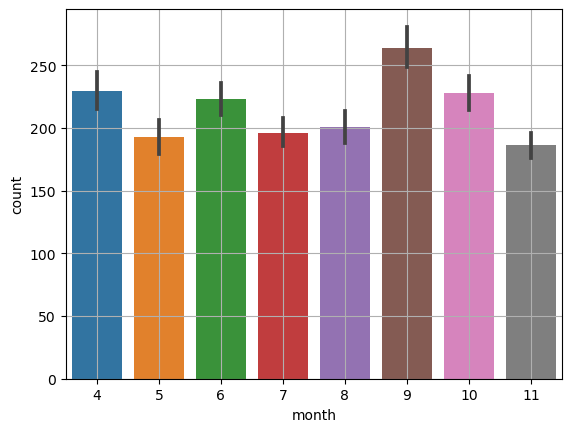

ANOVA result for month: F-statistic: 14.418555266868342, p-value: 1.0250409939149756e-18


In [42]:
var = 'month'
anova_and_barplot(df, var, target)

- 그래프 상으로는 관련이 없어 보이지만 통계상으로는 관련이 있어보인다
- 9월 11월은 다른 달과 조금 차이가 있어보임..

#### 4) weekday와 따릉이 대여량간 이변량 분석

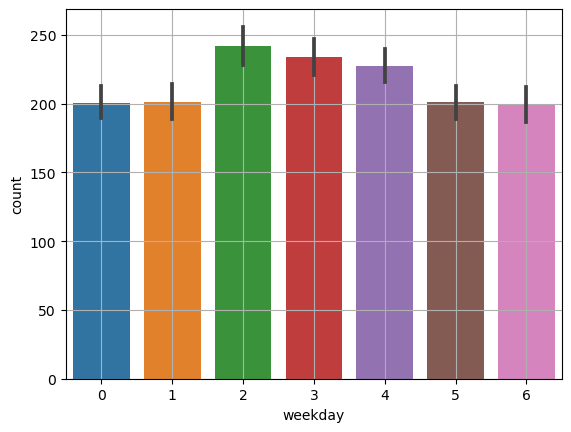

ANOVA result for weekday: F-statistic: 8.317297883731852, p-value: 5.378942897976812e-09


In [34]:
var = 'weekday'
anova_and_barplot(df, var, target)

- 그래프 상으로는 요일과 따릉이는 큰 관련이 없어보인다
- 하지만, 통계량을 기준으로는 약간은 관련이 있어보인다

### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)
* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    1. 시각화 : 그래프를 활용한 데이터 분석
    2. 수치화 : 상관분석
    3. 관계 평가

In [44]:
def eda_num_num(var_list, target, data):
    # 산점도
    plt.figure(figsize = (12, 18))
    for i in range(len(var_list)):
        plt.subplot(4, 2, i + 1)
        sns.regplot(x = var_list[i], y = target, data = data)
        plt.grid()
    plt.tight_layout()
    plt.show()
    
    # 상관계수
    for i in range(len(var_list)):
        result = spst.pearsonr(data[var_list[i]], data[target])
        print(f'{var_list[i]}의 상관계수 : {result[0]}, p-value : {result[1]}')

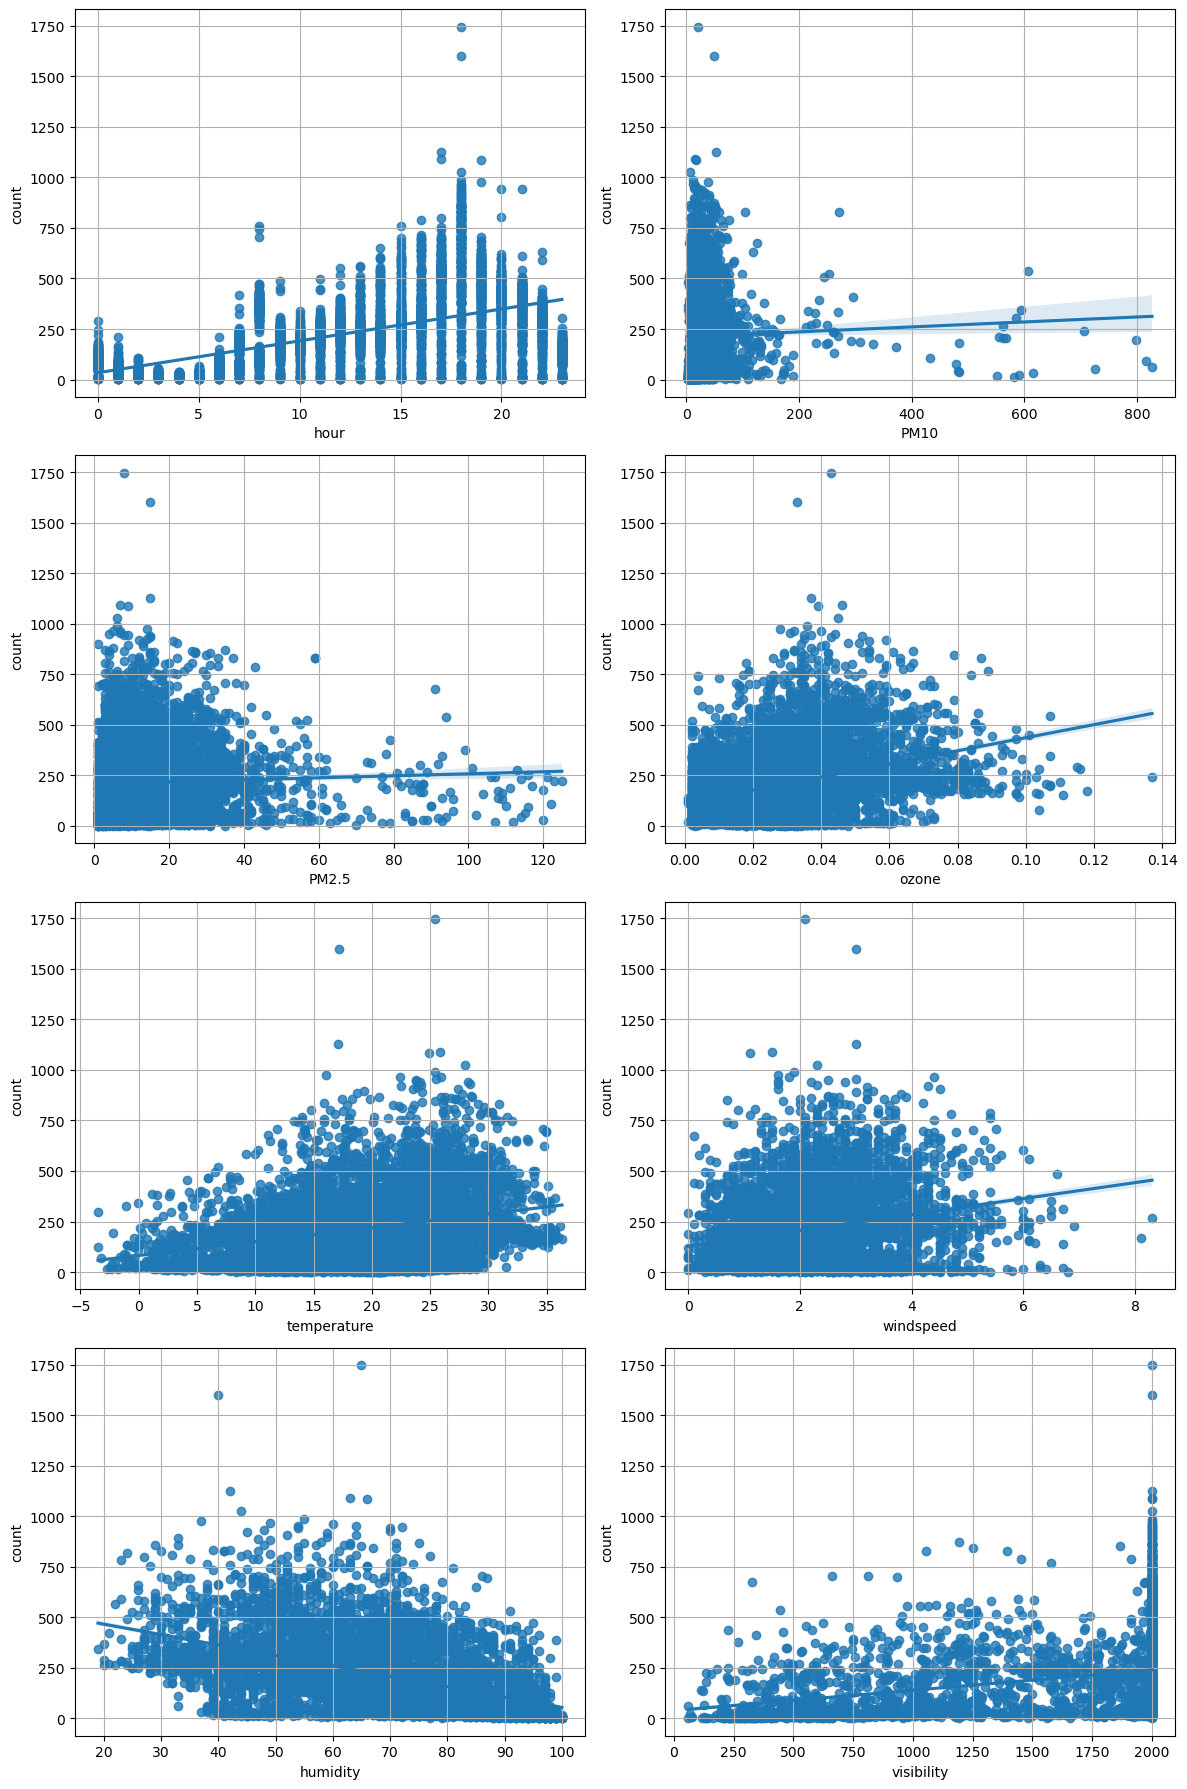

hour의 상관계수 : 0.5864350283919393, p-value : 0.0
PM10의 상관계수 : 0.028147495329876437, p-value : 0.031666294217247794
PM2.5의 상관계수 : 0.0369543440052327, p-value : 0.004783534919886874
ozone의 상관계수 : 0.31453346787674397, p-value : 5.666600575566576e-134
temperature의 상관계수 : 0.2771692363089791, p-value : 2.940516555113978e-103
windspeed의 상관계수 : 0.22372189900674888, p-value : 5.243317678213925e-67
humidity의 상관계수 : -0.4789554265904137, p-value : 0.0
visibility의 상관계수 : 0.26582778327488765, p-value : 7.87600385276935e-95


In [45]:
var_list = list(df)[1:6] + list(df)[7:10]

eda_num_num(var_list, target, df)

상관계수 (우리가 배운 기준)

- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음

음수 똑같음

- 따릉이 대여량과 높은 상관관계-> hour
- 따릉이 대여량과 중간 상관관계 -> ozone, temperature, windspeed, humidity, visibility
- 따릉이 대여량과 약간 상관관계 -> ...
- 따릉이 대여량과 관련이 없음 -> PM10, PM2.5

#### 1) 시간대별 대여량 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 2) 온도 데이터 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 3) 풍속에 대한 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 4) 습도에 대한 예측

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 5) 시정에 대한 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 6) 오존 데이터 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 7) 미세먼지 농도 데이터 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 8) 초미세먼지 농도에 대한 분석

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



## 4. 가설 검정

### 1. 강한 관계의 변수 (대립가설 채택) 
- precipitation, hour

### 2. 약한 관계의 변수
- month, ozone, temperature, windspeed, humidity, visibility

### 3. 관계 없는 변수 (귀무가설 채택)
- weekday, PM10, PM2.5

## 5. Insight 도출
1. 빌리기 전에 비가내리는지에 따라서 대여량이 달라진다 -> 강우 유무가 따릉이 수요에 중요 요소
2. 대여 시간도 따릉이 수요에 관련이 크다 -> 17 ~ 19시에 많은 수요가 있다(퇴근 시간 근처)
3. 9월에서 11월로 가면서 수요량의 차이가 눈에 띄게 감소한다
4. 기온이 올라갈때 15 ~ 25도 사이일때 따릉이의 수요량이 높다 (초여름 ~ 초가을 사이 따릉이 많이 이용)
5. 바람의 세기는 대체로 약했으며 바람이 안불 떄보다 조금 불 때 더 많이 따릉이를 이용하는 것으로 보인다.
    - 여름이 데이터상으로 많기 때문에 약간 바람이 불 때 따릉이를 조금 더 많이 타는 것 같다
6. 습도가 높아질수록 따릉이를 많이 이용하지 않는다 -> 무더운 여름날에 따릉이 안탐
7. 시계의 값이 높은 날 (화창한 날, 안개가 끼지 않은날) 따릉이를 더 많이 탄다